In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Mode _`temporel`_ avec paramètres - Circuit RC 

**A utiliser avec "circuit_rc_param.ino"**

In [2]:
temps_mesure = 6000
nombre_points = 100
parametres = ";{};{}".format(temps_mesure, nombre_points)

In [4]:
from web_sciences import WebSciences

my_init = '''
mode = "temporel";
commandes = [{{texte_bouton:"Charge", arduino:"{}"}},
                 {{texte_bouton:"Décharge", arduino:"{}"}}
                ];
'''.format("charge" + parametres, "decharge" + parametres)
my_init += '''
series = [{grandeur: "Uc", unite: "V"}, {grandeur: "E", unite: "V"}];
titre_graphe = "Circuit RC";
axes = [{grandeur: "t", unite: "ms"}, {grandeur: "U", unite: "V"}];
'''
interface = WebSciences(my_init)
interface.affiche()

In [5]:
# coller vos valeurs ici
t = [0, 60, 120, 180, 241, 301, 361, 421, 481, 541, 601, 661, 721, 781, 
841, 901, 961, 1021, 1081, 1141, 1201, 1261, 1321, 1381, 1441, 1501, 
1561, 1621, 1681, 1741, 1801, 1861, 1921, 1981, 2041, 2101, 2161, 2221, 
2281, 2341, 2401, 2461, 2521, 2581, 2641, 2701, 2761, 2821, 2881, 
2941, 3001, 3061, 3121, 3181, 3241, 3301, 3361, 3421, 3481, 3541, 3601, 
3661, 3721, 3781, 3841, 3901, 3961, 4021, 4081, 4141, 4201, 4261, 
4321, 4381, 4441, 4501, 4561, 4621, 4681, 4741, 4801, 4861, 4921, 4981, 
5041, 5101, 5161, 5221, 5281, 5341, 5401, 5461, 5521, 5581, 5641, 
5701, 5761, 5821, 5881, 5941]
Uc = [0.00, 0.270, 0.520, 0.760, 0.990, 1.20, 1.40, 1.58, 1.76, 1.93, 2.09, 
2.24, 2.39, 2.52, 2.65, 2.77, 2.88, 2.99, 3.09, 3.19, 3.28, 3.37, 
3.46, 3.53, 3.60, 3.68, 3.74, 3.81, 3.87, 3.92, 3.98, 4.03, 4.08, 4.13, 
4.16, 4.21, 4.25, 4.28, 4.32, 4.35, 4.38, 4.41, 4.45, 4.47, 4.49, 
4.53, 4.54, 4.57, 4.59, 4.60, 4.62, 4.64, 4.66, 4.68, 4.69, 4.70, 4.73, 
4.73, 4.74, 4.75, 4.77, 4.77, 4.79, 4.79, 4.80, 4.82, 4.82, 4.83, 
4.84, 4.85, 4.85, 4.86, 4.87, 4.87, 4.88, 4.88, 4.88, 4.89, 4.89, 4.90, 
4.90, 4.91, 4.91, 4.92, 4.92, 4.92, 4.93, 4.93, 4.93, 4.93, 4.93, 
4.94, 4.94, 4.94, 4.94, 4.95, 4.95, 4.95, 4.95, 4.95]
E = [4.99, 4.99, 4.99, 4.98, 4.99, 4.99, 4.99, 4.99, 4.99, 4.98, 4.99, 
4.99, 4.99, 4.99, 4.99, 4.99, 5.00, 4.99, 5.00, 5.00, 4.99, 4.99, 5.00, 
4.99, 4.99, 4.99, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 4.99, 5.00, 4.99, 
5.00, 5.00, 5.00, 5.00, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 5.00, 5.00, 5.00, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 
5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00, 5.00]

In [6]:
# calcul de t en secondes
t = [e*1e-3 for e in t]
# calcul de ur (on pourrait aussi utiliser numpy)
Ur = [e-uc for e, uc in zip(E, Uc)]

## 2. Représentation graphique des données

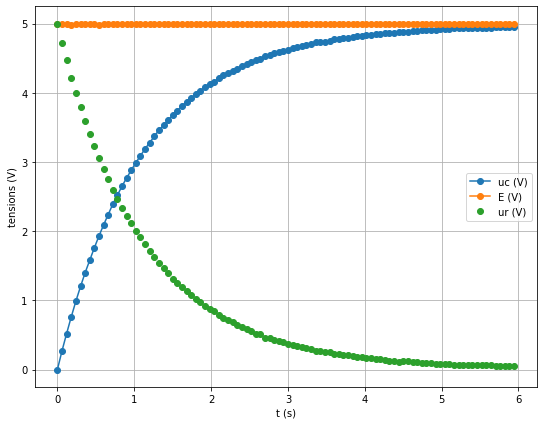

In [7]:
fig_c = plt.figure("Charge d'un condensateur", figsize= (9,7))
plt.clf()
plt.plot(t, Uc, marker = 'o', label = 'uc (V)')
plt.plot(t, E, marker = 'o', label = 'E (V)')
plt.plot(t, Ur, marker = 'o', linestyle='', label = 'ur (V)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.show()

## 3. Mesure de $\tau$

###  $1^{ère}$ méthode : à $t = \tau \; , 63 \%$ du saut de tension a eu lieu

In [8]:
# on recherche l'index de l'élément du tableau uc
# tq uc[k] = np.max(uc)*0.63
i = 0
while Uc[i] <= 4.99*0.63:
    i = i + 1
# print(i)
print(f"La constante de temps est tau =  {t[i]-t[0]:.3f} s" )

La constante de temps est tau =  1.141 s


### $2^{ème}$ méthode: ajustement à une exponentielle

In [9]:
def fonct_ajust(t, d):
    return 5*(1 - np.exp(-t/d))

popt, pcov = curve_fit(fonct_ajust, t, Uc)
# popt
print(f'La valeur de tau est {popt[0]:.3f} s' )

La valeur de tau est 1.133 s


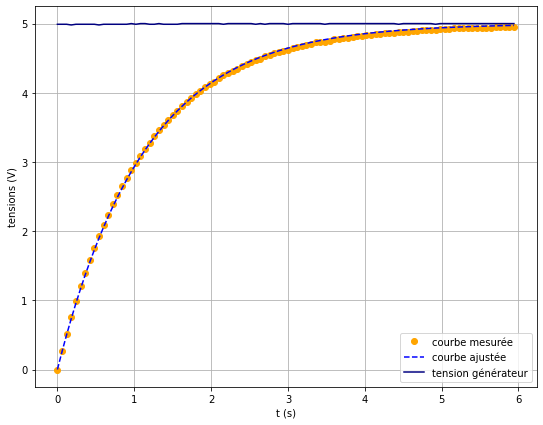

In [10]:
#  Graphe et modélisation
fig3 = plt.figure(figsize= (9,7))
plt.plot(t, Uc, linestyle='', marker ='o', color ='orange', label = 'courbe mesurée')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.plot(t, E, color='navy', label = 'tension générateur')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()

## Tracé des graphes $u_C = f(t)$ et $u_R = f(t)$ avec les tangentes 

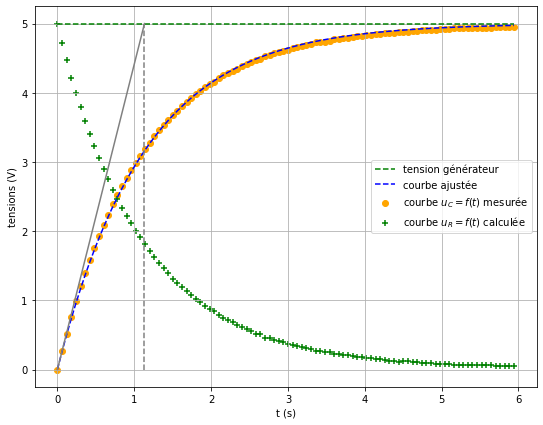

In [11]:
# Avec tracé de la tangente
tau = popt[0]
fig4 = plt.figure(figsize= (9,7))
plt.plot(t, [5.0 for e in t], color='green', linestyle='--', label = 'tension générateur')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.scatter(t, Uc, marker='o', color = 'orange', label = 'courbe $u_C=f(t)$ mesurée')
plt.scatter(t, Ur, marker='+', color = 'green', label = 'courbe $u_R=f(t)$ calculée')
plt.plot([0, tau], [0, 5], '-', color='grey')
plt.plot([tau, tau], [0, 5], '--', color='grey')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()